#### Variables coded in this notebook: 6, 11, 16, 19

In [1]:
import os, pandas as pd, re

In [2]:
exportdate = 20180327
projectname = 'repract'

In [3]:
df = pd.read_csv(f'../../data/{exportdate}{projectname}.csv')
df.head(2)

,lfdn,external_lfdn,tester,dispcode,lastpage,quality,duration,v_7039,v_7040,v_7041,...,output_mode,javascript,flash,session_id,language,cleaned,ats,datetime,date_of_last_access,date_of_first_mail
0,106,0,no tester,Completed after break (32),2138658,NotShown,-1,NotShown,NotShown,0,...,HTML,NotShown,NotShown,3bb21c1b318e2f6b87557566bdd6b4d9,English,Not cleaned,1515411510,2018-01-08 11:38:30,2018-01-08 13:07:14,0000-00-00 00:00:00
1,131,0,no tester,Completed (31),2138658,NotShown,3805,NotShown,NotShown,NotShown,...,HTML,NotShown,NotShown,fc38f6556787a459c2cc604abf799448,English,Not cleaned,1515667019,2018-01-11 10:36:59,2018-01-11 11:40:24,0000-00-00 00:00:00


In [4]:
basedir = '../../data/freetext'
freetextfiles = os.listdir(basedir)
dfs = {file[:-4]:pd.read_csv(f'{basedir}/{file}') for file in freetextfiles}

In [5]:
dfs.keys()

dict_keys(['.DS_S', 'v_11', 'v_1373', 'v_16', 'v_18', 'v_19', 'v_6', 'v_8345etseq', 'v_8780etseq'])

In [6]:
def add_unique_code(df, func, varname):
    df[f'{varname}_coded'] = func(df[varname])
    return df

In [7]:
codedir = '../../analysis/freetext'
def write_coded(df, varname, sep=','):
    filepath = f'{codedir}/{varname}_coded.csv'
    df.to_csv(f'{codedir}/{varname}_coded.csv', index=False, sep=sep)
    print(f'File stored at {filepath}.')

#### Variable 6 (_Other_ for variable 5) - primary working area

Options shown were:
* Requirements Engineer
* Business Analyst
* Architect
* Tester / Test Manager
* Project Manager
* Developer
* Product Owner
* Designer
* Other (please specify)

In [8]:
def code_var_6(series):
    coded_series = []
    for value in series:
        value = value.lower()
        val = None
        if re.search('lecturer|phd\scandidate|researcher|r&d', value):
            val = 'Researcher'
        elif re.search('consultant', value):
            val = 'Consultant'
        elif re.search('systems?\sengineer', value):
            val = 'Architect'
        elif re.search('processes', value):
            val = 'Process Designer'
        elif re.search('design', value):
            val = 'Designer'
        elif re.search('marketing|iso\s\d+', value):
            val = 'Context Roles' # this was: 1 Marketing, 1 Regulator
        elif re.search('manag|cto', value):
            val = 'Manager'
        elif (re.search('different|changing|both|depend(?:s|ing)|combin', 
                        value) or (len(re.findall(',', value)) > 1)):
            val = 'Multiple Roles'
        else:
            raise Exception(f'Difficulty Coding Entry: {value}')
        coded_series.append(val)
    return coded_series

In [9]:
coded_v6 = add_unique_code(dfs['v_6'], code_var_6, 'v_6')
coded_v6.head()

,lfdn,v_6,v_6_coded
0,106,Researcher,Researcher
1,139,Product Management Coach,Manager
2,173,Functional Safety Consultant focussing of the ...,Consultant
3,216,Enterprise Systems of Systems researcher (auto...,Researcher
4,240,"Changing with different jobs, RE, Architect, D...",Multiple Roles


In [10]:
coded_v6.groupby('v_6_coded').count()[['lfdn']]

,lfdn
v_6_coded,
Architect,3
Consultant,3
Context Roles,2
Designer,1
Manager,5
Multiple Roles,6
Process Designer,2
Researcher,7


In [11]:
assert coded_v6.groupby('v_6_coded').count().v_6.sum() == len(dfs['v_6']['v_6'])

In [12]:
write_coded(coded_v6, 'v_6', sep=';')

File stored at ../../analysis/freetext/v_6_coded.csv.


#### Variable 11 - years of experience

In [13]:
def code_var_11(series):
    coded_series = []
    replace_dict = {'years?\.?|y(?!\w)|about': '',
                    'six':'6',
                    'one':'1',
                    ',':'.',
                    '\+|>':''}
    this_year = 2018
    for value in series:
        value = value.lower()
        val = None
        try:
            val = float(value)
        except:
            val = value
            for k, v in replace_dict.items():
                val = re.sub(k, v, val)
            try:
                val = float(val)
            except:
                if re.search('since\s(\d{4})', val):
                    val = 2018 - float(re.search('since\s(\d{4})', val).group(1))
                elif re.search('\d+', val):
                    val = sum([float(x) for x in re.findall('\d+', val)])
                else:
                    raise Exception(f'Difficulty Coding Entry: {value}')
        coded_series.append(val)
    return coded_series

In [14]:
coded_v11 = add_unique_code(dfs['v_11'], code_var_11, 'v_11')
coded_v11.head()

,lfdn,v_11,v_11_coded
0,106,4,4.0
1,131,1,1.0
2,139,10,10.0
3,153,10,10.0
4,156,15,15.0


In [15]:
%matplotlib notebook
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


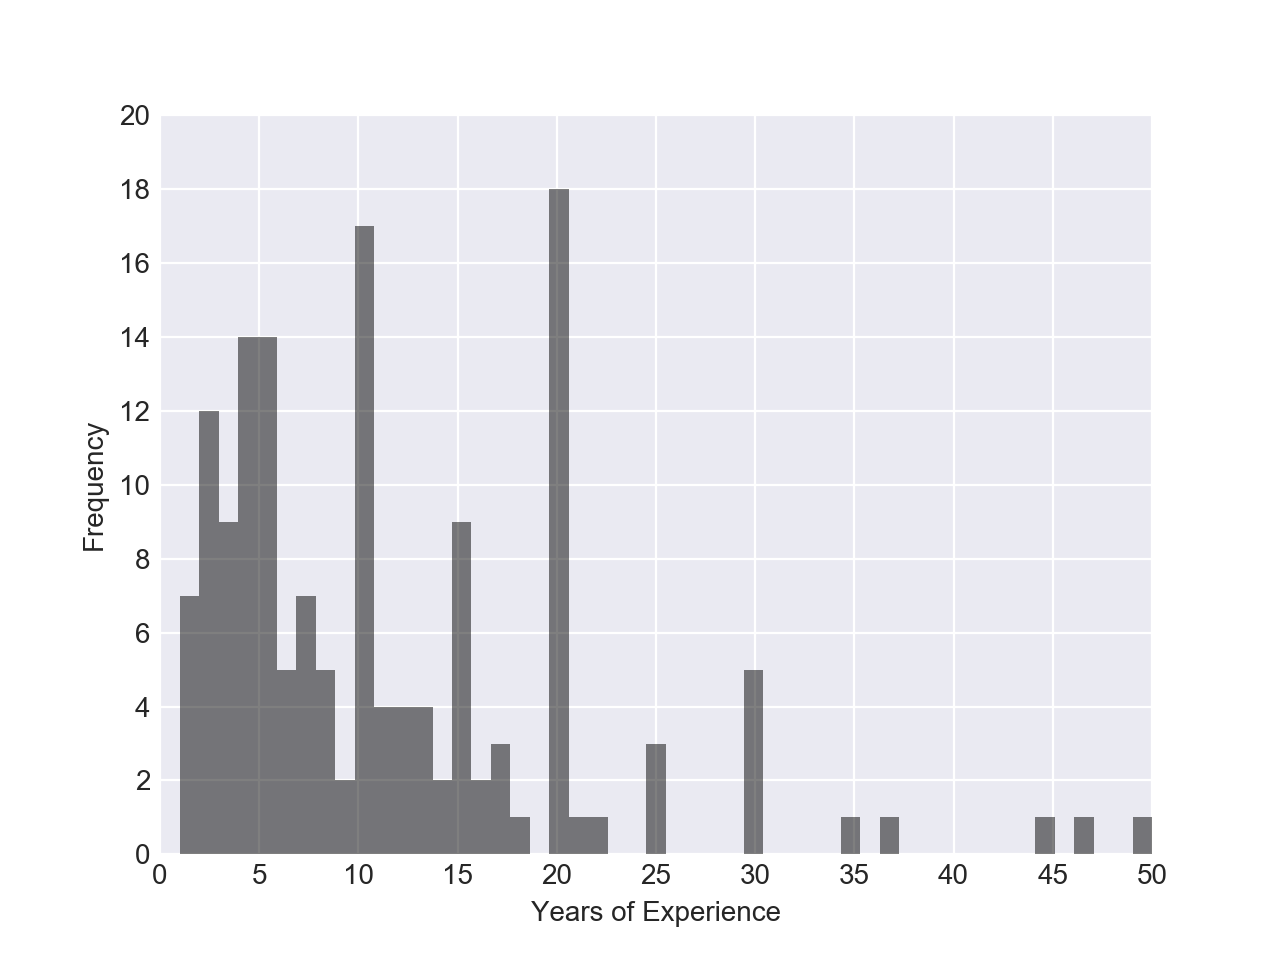

In [16]:
coded_v11.v_11_coded.plot.hist(bins=50, color='k', alpha=0.5)
plt.xlabel('Years of Experience');
plt.xlim(0,1)
plt.xticks(range(0,51,5))
plt.yticks(range(0,21,2));

In [17]:
#write_coded(coded_v11, 'v_11', sep=';')

File stored at ../../analysis/freetext/v_11_coded.csv.


#### Variable 16 (_Other_ for Variable 15) - class of system

Options shown were:
- Software-intensive embedded systems
- (Business) information systems
- Hybrid / mix of embedded systems and information systems
- Other (please specify)

NB: I feel the coding is somewhat arbitrary - but at least it's transparently arbitrary...

In [18]:
def code_var_16(series):
    coded_series = []
    for value in series:
        value = value.lower()
        val = None
        if re.search('all.*?above', value):
            val = 'Hybrid / mix of embedded systems and information systems'
        elif (re.search('c(?:ustomer|onsumer)|online|information', value) # infosys
            or re.search('(?<!\w)erp(?!\w)', value)): # infosys, special (and doubtful ;-))
            val = '(Business) information systems'
        elif re.search('machine|infrastructure|processor', value): 
            # or would you want to class these as hybrid?
            val = 'Hardware'
        elif re.search('aeronautics|railway', value): # guessing this one
            val = 'Hybrid / mix of embedded systems and information systems'
        else:
            raise Exception(f'Difficulty Coding Entry: {value}')
        coded_series.append(val)
    return coded_series

In [19]:
len(dfs['v_16'])

12

In [20]:
coded_v16 = add_unique_code(dfs['v_16'], code_var_16, 'v_16')
coded_v16.head()

,lfdn,v_16,v_16_coded
0,139,Customer facing software products,(Business) information systems
1,240,"Different, consumer platforms, mobile Apps etc.",(Business) information systems
2,245,Aeronautics,Hybrid / mix of embedded systems and informati...
3,310,"Requirements Engineering tools, compilers and ...",(Business) information systems
4,341,Railway systems,Hybrid / mix of embedded systems and informati...


In [21]:
coded_v16.groupby('v_16_coded').count()[['lfdn']]

,lfdn
v_16_coded,
(Business) information systems,5
Hardware,3
Hybrid / mix of embedded systems and information systems,4


In [22]:
#write_coded(coded_v16, 'v_16', sep=';')

File stored at ../../analysis/freetext/v_16_coded.csv.


#### Variable 19 - Industry Sector (not standardized as in NaPiRE!)

NB: This is - of course - drastically overfitting, but there's hardly another option (the NaPiRE categories are very problematic and thus should not be reused).

In [23]:
def code_var_19(series):
    coded_series = []
    for value in series:
        value = value.lower()
        val = None
        if (re.search('mixed|varies(?!\w)|several|ecosystem|(?<!\s)services(?!\s)', 
                      value)
            or (len(re.findall(',', value)) > 1) or re.search('and', value) 
            and not re.search('oil.*?gas|bank.*?fin|ins.*?bank|aero.*?defen|well.*heal', value)):
            val = 'Multiple Sectors'
        elif re.search('university|research|academi', value):
            val = 'Academia'
        elif re.search('aero|avi(?:on|at)', value):
            val = 'Aeronautics'
        elif re.search('automation', value):
            val = 'Automation'
        elif re.search('automotive', value):
            val = 'Automotive'
        elif re.search('consult', value):
            val = 'Consulting'
        elif re.search('e\-?commerc|online', value):
            val = 'E-Commerce'
        elif re.search('educati', value):
            val = 'Education'
        elif re.search('energy|(?:oil|gas)(?!\w)', value):
            val = 'Energy'
        elif re.search('financ|banki|insuran', value):
            val = 'Financial Services'
        elif re.search('semiconductor|robotics|computer\sengin|industrial\ssys', value):
            val = 'Hardware' 
        elif re.search('medic(?:al|ine)|heal?th|wellness', value):
            val = 'Healthcare' 
        elif re.search('railway|building|pipelines', value):
            val = 'Infrastructure'
        elif re.search('government|public\s(?!transport)|defen[cs]e', value):
            val = 'Public Sector'
        elif re.search('software|saas', value):
            val = 'Software'
        elif re.search('transport|logis\w|marine', value):
            val = 'Transportation'
        elif re.search('tourism', value): 
            val = 'Tourism'
        elif re.search(('commun|telecom|(?<!\w)ict(?!\w)|(?<!\w)it(?!\w)|(?<!\w)iot(?!\w)|'
                       +'intranet|electron|network|information'), value): 
            val = 'ICT'
        else:
            raise Exception(f'Difficulty Coding Entry: {value}')
        coded_series.append(val)
    return coded_series

In [24]:
coded_v19 = add_unique_code(dfs['v_19'], code_var_19, 'v_19')
coded_v19.head()

,lfdn,v_19,v_19_coded
0,106,Automotive,Automotive
1,131,education,Education
2,139,Wide range (from automotive supplier to insura...,Automotive
3,153,Public administration,Public Sector
4,156,Telecommunications,ICT


In [25]:
#write_coded(coded_v19, 'v_19', sep=';')

File stored at ../../analysis/freetext/v_19_coded.csv.


In [26]:
coded_v19.groupby('v_19_coded').count()[['lfdn']]

,lfdn
v_19_coded,
Academia,2
Aeronautics,7
Automation,3
Automotive,21
Consulting,2
E-Commerce,3
Education,7
Energy,4
Financial Services,20


The End.